# Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading and Understandig data

In [2]:
df= pd.read_excel('vehicle^Mcoupon^Mrecommendation.xlsx')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# shape
df.shape

(12684, 26)

In [4]:
# columns
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Convert age column to numeric (handling any non-numeric values)
df["age"] = pd.to_numeric(df["age"], errors='coerce')

In [7]:
# Update the age column
df["age"] = df["age"].apply(lambda x: 21 if x < 21 else (50 if x > 50 else x))
df['age'] = df['age'].fillna(df['age'].mean()) 

In [8]:
def split_data(data):
    return data.split('-')

In [9]:
income = list(df['income'].apply(split_data)[::])

In [10]:
min_income = []
max_income = []
for i in income:
    min_income.append(i[0])

In [11]:
min_income

['$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$37500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$62500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$12500 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$75000 ',
 '$7

In [12]:
max_income = []
for i in income:
    max_income.append(i[-1])

In [13]:
max_income

[' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $49999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $74999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $24999',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $87499',
 ' $

In [14]:
df['min_income'] = min_income
df['max_income'] = max_income

In [15]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,$37500,$49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,$37500,$49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,$37500,$49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,$37500,$49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,$37500,$49999


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  float64
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   108 non-null    object 
 15  Bar                

In [17]:
# drop income
df.drop(columns = 'income',inplace=True)

In [18]:
df['min_income'].unique()

array(['$37500 ', '$62500 ', '$12500 ', '$75000 ', '$50000 ', '$25000 ',
       '$100000 or More', '$87500 ', 'Less than $12500'], dtype=object)

In [19]:
def clean_min_income(data):
    if '$' in data:
        data = float(data[1::])
        return data
    elif data == '$100000 or More':
        data = float(100000)
        return data
    elif data == 'Less than $12500':
        data = float(12500)
        return data

In [20]:
def clean_min_income(data):
    if '$' in data:
        data = data.replace('$', '').replace(' or More', '').replace('Less than ', '')
        return float(data)
    return None  # Handle cases where input does not match expected format


In [21]:
df['min_income'].apply(clean_min_income)

0        37500.0
1        37500.0
2        37500.0
3        37500.0
4        37500.0
          ...   
12679    75000.0
12680    75000.0
12681    75000.0
12682    75000.0
12683    75000.0
Name: min_income, Length: 12684, dtype: float64

In [22]:
'''

'''
def clean_max_income(data):
    if '$' in data:
        data = data.replace('$', '').replace(' or More', '').replace('Less than ', '')
        return float(data)
    return None  # Handle cases where input does dfnot match expected format

In [23]:
df['max_income'].apply(clean_max_income)

0        49999.0
1        49999.0
2        49999.0
3        49999.0
4        49999.0
          ...   
12679    87499.0
12680    87499.0
12681    87499.0
12682    87499.0
12683    87499.0
Name: max_income, Length: 12684, dtype: float64

In [24]:
df["max_income"]=df["max_income"].str.replace("$","",regex=False)
df["max_income"]=pd.to_numeric(df["max_income"],errors="coerce")

In [25]:
# Ensure all values are strings before applying string operations
df["min_income"] = df["min_income"].astype(str)

# Clean the column by removing unwanted characters
df["min_income"] = (
    df["min_income"]
    .str.replace("$", "", regex=False)  # Remove the dollar sign
    .str.replace(" or More", "", regex=False)  # Remove " or More"
    .str.replace("Less than ", "", regex=False)  # Remove "Less than "
)

# Convert to numeric, forcing errors to NaN
df["min_income"] = pd.to_numeric(df["min_income"], errors="coerce")



In [26]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,37500,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999.0


In [27]:
df['max_income'].unique()

array([49999., 74999., 24999., 87499., 62499., 37499.,    nan, 99999.])

In [28]:
# Step 1: Compute mean of 'max_income' while ignoring NaN
mean_value = df['max_income'].mean()

# Step 2: Replace NaN values in 'max_income' only (keeping other columns unchanged)
df['max_income'].fillna(mean_value, inplace=True)


In [29]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
min_income                  0
max_income                  0
dtype: int64

In [30]:
for col in df.columns:
    print(f'Column {col} unique values : {df[col].unique()}')
    print('-'*80)

Column destination unique values : ['No Urgent Place' 'Home' 'Work']
--------------------------------------------------------------------------------
Column passanger unique values : ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
--------------------------------------------------------------------------------
Column weather unique values : ['Sunny' 'Rainy' 'Snowy']
--------------------------------------------------------------------------------
Column temperature unique values : [55 80 30]
--------------------------------------------------------------------------------
Column time unique values : ['2PM' '10AM' '6PM' '7AM' '10PM']
--------------------------------------------------------------------------------
Column coupon unique values : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
--------------------------------------------------------------------------------
Column expiration unique values : ['1d' '2h']
--------------------------------------------

In [31]:
# feature enhineering on expiration column

def clean_expiration(data):
    data = data.replace('1d', '24').replace('2h', '2')
    return float(data)
    # return None  # Handle cases where input does dfnot match expected format

In [32]:
expiration_in_hrs = df['expiration'].apply(clean_expiration)

In [33]:
df['expiration'] = expiration_in_hrs

In [34]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24.0,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,37500,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2.0,Female,21.0,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2.0,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2.0,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24.0,Female,21.0,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999.0


In [35]:
# Handling   RestaurantLessThan20	Column
df['RestaurantLessThan20'].unique()

'''
In this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. 
and we need to make it clear for understanding.

step1 : impute relevant value instead of insignificant values

step2 : Convert column from object to int for futher analysis

step3 : checking distribution of particular column for imputing values accordingly

step4 : impute values
'''



"\nIn this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. \nand we need to make it clear for understanding.\n\nstep1 : impute relevant value instead of insignificant values\n\nstep2 : Convert column from object to int for futher analysis\n\nstep3 : checking distribution of particular column for imputing values accordingly\n\nstep4 : impute values\n"

In [36]:
#  Step 1 :impute values 
mode_value = df['RestaurantLessThan20'].mode()[0]

df['RestaurantLessThan20'].fillna(mode_value,inplace=True)

In [37]:
# Step 2: Replace categorical values with numerical equivalents
mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(mapping)

In [38]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  float64
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  float64
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  car                   108 non-null    object 
 14  Bar                   12577 non-null  object 
 15  CoffeeHouse        

<Axes: xlabel='RestaurantLessThan20', ylabel='Count'>

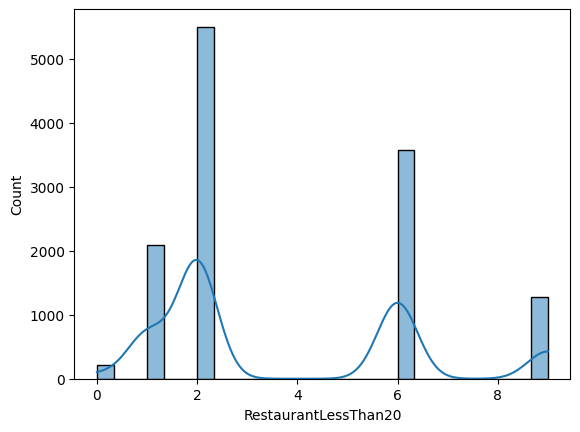

In [39]:
# step 4 : checking distribution of particular column for imputing values accordingly
sns.histplot(df['RestaurantLessThan20'],kde=True)

In [40]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24.0,Female,21.0,Unmarried partner,...,6,1~3,1,0,0,0,1,1,37500,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,1~3,1,0,0,0,1,0,37500,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2.0,Female,21.0,Unmarried partner,...,6,1~3,1,1,0,0,1,1,37500,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,1~3,1,1,0,0,1,0,37500,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24.0,Female,21.0,Unmarried partner,...,6,1~3,1,1,0,0,1,0,37500,49999.0


In [41]:
# Handling Restaurant20To50	Column
df['Restaurant20To50'].unique()

'''
In this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. 
and we need to make it clear for understanding.

step1 : impute relevant value instead of insignificant values

step2 : Convert column from object to int for futher analysis

step3 : checking distribution of particular column for imputing values accordingly

step4 : impute values
'''

"\nIn this column we have multiple value like 'never', 'less1', '1~3', 'gt8', nan, '4~8'.. \nand we need to make it clear for understanding.\n\nstep1 : impute relevant value instead of insignificant values\n\nstep2 : Convert column from object to int for futher analysis\n\nstep3 : checking distribution of particular column for imputing values accordingly\n\nstep4 : impute values\n"

In [42]:
#  Step 1 :impute values 
mode_value = df['Restaurant20To50'].mode()[0]

df['Restaurant20To50'].fillna(mode_value,inplace=True)

In [43]:
# Step 2: Replace categorical values with numerical equivalents
mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}
df['Restaurant20To50'] = df['Restaurant20To50'].map(mapping)

In [44]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24.0,Female,21.0,Unmarried partner,...,6,2,1,0,0,0,1,1,37500,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,2,1,0,0,0,1,0,37500,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,1,37500,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,0,37500,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,0,37500,49999.0


In [45]:
df['max_income'].unique()

array([49999.        , 74999.        , 24999.        , 87499.        ,
       62499.        , 37499.        , 54828.14395316, 99999.        ])

In [46]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24.0,Female,21.0,Unmarried partner,...,6,2,1,0,0,0,1,1,37500,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,2,1,0,0,0,1,0,37500,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,1,37500,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,0,37500,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24.0,Female,21.0,Unmarried partner,...,6,2,1,1,0,0,1,0,37500,49999.0


In [47]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
min_income                  0
max_income                  0
dtype: int64

In [48]:
# Remove the specified columns
df.drop(columns=['car', 'Bar', 'CoffeeHouse', 'CarryAway'], inplace=True)

In [49]:
# Checking Imbalanced 
df['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [50]:
# data encoding
''''
df -> 1. numeric
   -> 2. Categorical-> data Encoding(label Encoding)
   cocat : df = numeric + Categorical -> data encoding(label encoding)
'''
cat_df = df.select_dtypes(include ='object')
num_df = df.select_dtypes(exclude ='object')

In [51]:
cat_df.head(2)

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),Female,Unmarried partner,Some college - no degree,Unemployed
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,Female,Unmarried partner,Some college - no degree,Unemployed


In [52]:
num_df.head(2)

,temperature,expiration,age,has_children,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,55,24.0,21.0,1,6,2,1,0,0,0,1,1,37500,49999.0
1,80,2.0,21.0,1,6,2,1,0,0,0,1,0,37500,49999.0


###  Encoding Data

In [53]:
# importing class
from sklearn.preprocessing import LabelEncoder

# creating instance
lr = LabelEncoder()

# list of columns name
columns = cat_df.columns

#fit transform
for col in columns:
    cat_df[col] = lr.fit_transform(cat_df[col])


In [54]:
cat_df.head(2)

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation
0,1,0,2,2,4,0,3,5,24
1,1,1,2,0,2,0,3,5,24


In [55]:
# concat 
df= pd.concat([cat_df,num_df],axis = 1)

In [56]:
df.head()

,destination,passanger,weather,time,coupon,gender,maritalStatus,education,occupation,temperature,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,min_income,max_income
0,1,0,2,2,4,0,3,5,24,55,...,6,2,1,0,0,0,1,1,37500,49999.0
1,1,1,2,0,2,0,3,5,24,80,...,6,2,1,0,0,0,1,0,37500,49999.0
2,1,1,2,0,1,0,3,5,24,80,...,6,2,1,1,0,0,1,1,37500,49999.0
3,1,1,2,2,2,0,3,5,24,80,...,6,2,1,1,0,0,1,0,37500,49999.0
4,1,1,2,2,2,0,3,5,24,80,...,6,2,1,1,0,0,1,0,37500,49999.0


### spliting the data into x and y

In [57]:

x =df.drop(columns= 'Y')
y= df['Y']

### splitting data into train and test


In [58]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Model 1

In [59]:
# import ensemble class
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
# create instance
bg = BaggingClassifier(LogisticRegression(class_weight='balanced'))

# fit
bg.fit(xtrain,ytrain)

# predict
ypred = bg.predict(xtest)

# Accuracy
print(f'Training Score: {bg.score(xtrain,ytrain)}')
print(f'Testing Score: {bg.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.5899280575539568
Testing Score: 0.5912495072920773
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1078
           1       0.65      0.63      0.64      1459

    accuracy                           0.59      2537
   macro avg       0.58      0.59      0.58      2537
weighted avg       0.59      0.59      0.59      2537

[[586 492]
 [545 914]]


### Model 2

In [60]:
# import ensemble class
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# create instance
bg = BaggingClassifier(DecisionTreeClassifier())

# fit
bg.fit(xtrain,ytrain)

# predict
ypred = bg.predict(xtest)

# Accuracy
print(f'Training Score: {bg.score(xtrain,ytrain)}')
print(f'Testing Score: {bg.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.9809795998817384
Testing Score: 0.7012219156484036
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.70      0.66      1078
           1       0.76      0.70      0.73      1459

    accuracy                           0.70      2537
   macro avg       0.70      0.70      0.70      2537
weighted avg       0.71      0.70      0.70      2537

[[ 752  326]
 [ 432 1027]]


# Model 3: ROC-AUC

In [61]:
bg.predict_proba(xtest)[:,1]

array([0. , 0.4, 0. , ..., 0. , 0.9, 0.6])

In [62]:
#class
from sklearn.metrics import roc_curve,auc

# positive prediction from model
y_probs = bg.predict_proba(xtest)[:,1]

# compute roc and auc
fpr,tpr,_ =roc_curve(ytest,y_probs)

# auc
roc_auc = auc(fpr,tpr)
print(confusion_matrix(ytest,ypred))

[[ 752  326]
 [ 432 1027]]


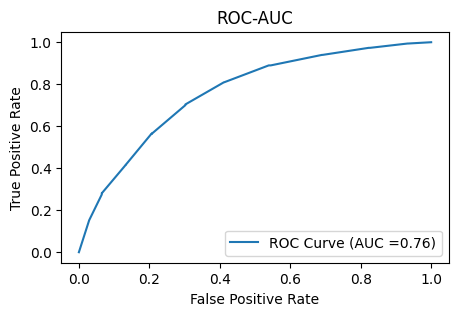

In [63]:
# plot roc and auc 
plt.figure(figsize=[5,3])
plt.plot(fpr,tpr,label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Model4 : Randomforest

In [64]:
# import ensemble class
from sklearn.ensemble import RandomForestClassifier
# create instance
bg = RandomForestClassifier()

# fit
bg.fit(xtrain,ytrain)

# predict
ypred = bg.predict(xtest)

# Accuracy
print(f'Training Score: {bg.score(xtrain,ytrain)}')
print(f'Testing Score: {bg.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.9971420124174633
Testing Score: 0.7363027197477335
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1078
           1       0.75      0.81      0.78      1459

    accuracy                           0.74      2537
   macro avg       0.73      0.72      0.73      2537
weighted avg       0.73      0.74      0.73      2537

[[ 690  388]
 [ 281 1178]]


In [84]:
#class
from sklearn.metrics import roc_curve,auc

# positive prediction from model
y_probs =bg.predict_proba(xtest)[:,1]

# compute roc and auc
fpr,tpr,_ =roc_curve(ytest,y_probs)

# auc
roc_auc = auc(fpr,tpr)

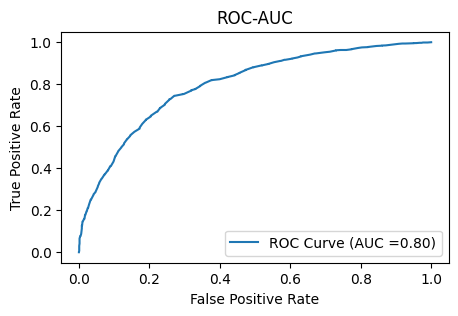

In [83]:
# plot roc and auc 
plt.figure(figsize=[5,3])
plt.plot(fpr,tpr,label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Voting Classifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
# estimators : list of (str, estimator) tuples
model = []
model.append(('LogisticRegression',LogisticRegression()))
model.append(('KNeighborsClassifier',KNeighborsClassifier()))
model.append(('DecisionTreeClassifier',DecisionTreeClassifier()))

In [67]:
model

[('LogisticRegression', LogisticRegression()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier())]

In [68]:
# voting classifier
from sklearn.ensemble import VotingClassifier

# instance of class
vc = VotingClassifier(estimators = model)

# fit
vc.fit(xtrain,ytrain)

# predict
ypred = vc.predict(xtest)

# Accuracy
print(f'Training Score: {vc.score(xtrain,ytrain)}')
print(f'Testing Score: {vc.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.8509904405242928
Testing Score: 0.6633819471817107
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1078
           1       0.68      0.79      0.73      1459

    accuracy                           0.66      2537
   macro avg       0.66      0.64      0.64      2537
weighted avg       0.66      0.66      0.66      2537

[[ 537  541]
 [ 313 1146]]


### Boosting 

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(xtrain,ytrain)

ypred = ada.predict(xtest)

# Accuracy
print(f'Training Score: {ada.score(xtrain,ytrain)}')
print(f'Testing Score: {ada.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.6629545678525672
Testing Score: 0.6767836026803311
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1078
           1       0.70      0.77      0.73      1459

    accuracy                           0.68      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.68      0.67      2537

[[ 592  486]
 [ 334 1125]]


In [77]:
#class
from sklearn.metrics import roc_curve,auc

# positive prediction from model
y_probs = ada.predict_proba(xtest)[:,1]

# compute roc and auc
fpr,tpr,_ =roc_curve(ytest,y_probs)

# auc
roc_auc = auc(fpr,tpr)

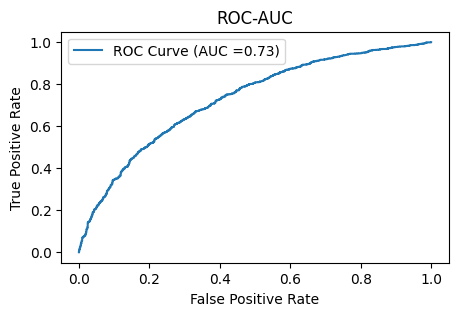

In [78]:
# plot roc and auc 
plt.figure(figsize=[5,3])
plt.plot(fpr,tpr,label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

ada_gbc = GradientBoostingClassifier()

ada_gbc.fit(xtrain,ytrain)

ypred = ada_gbc.predict(xtest)

# Accuracy
print(f'Training Score: {ada_gbc.score(xtrain,ytrain)}')
print(f'Testing Score: {ada_gbc.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.7083867152853061
Testing Score: 0.7094994087504927
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1078
           1       0.73      0.79      0.76      1459

    accuracy                           0.71      2537
   macro avg       0.70      0.69      0.70      2537
weighted avg       0.71      0.71      0.71      2537

[[ 643  435]
 [ 302 1157]]


In [71]:
#class
from sklearn.metrics import roc_curve,auc

# positive prediction from model
y_probs = ada_gbc.predict_proba(xtest)[:,1]

# compute roc and auc
fpr,tpr,_ =roc_curve(ytest,y_probs)

# auc
roc_auc = auc(fpr,tpr)

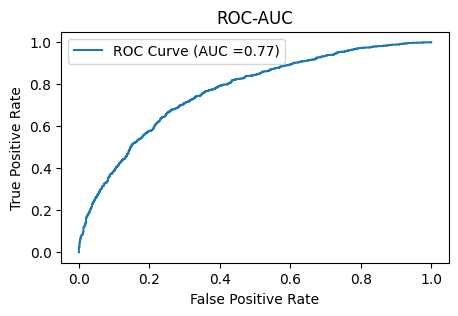

In [72]:
# plot roc and auc 
plt.figure(figsize=[5,3])
plt.plot(fpr,tpr,label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Xtream Gradient Boosting

In [73]:

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(xtrain,ytrain)

ypred = xgb.predict(xtest)

# Accuracy
print(f'Training Score: {xgb.score(xtrain,ytrain)}')
print(f'Testing Score: {xgb.score(xtest,ytest)}')

# classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Training Score: 0.9030255247856509
Testing Score: 0.7508868742609381
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      1078
           1       0.77      0.81      0.79      1459

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537

[[ 724  354]
 [ 278 1181]]


In [74]:
#class
from sklearn.metrics import roc_curve,auc

# positive prediction from model
y_probs = xgb.predict_proba(xtest)[:,1]

# compute roc and auc
fpr,tpr,_ =roc_curve(ytest,y_probs)

# auc
roc_auc = auc(fpr,tpr)


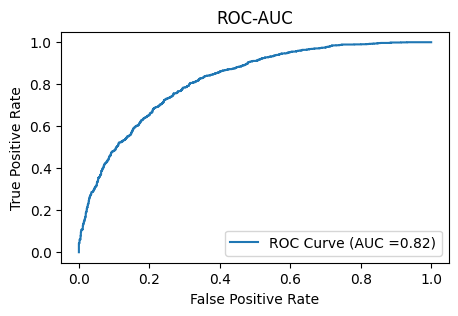

In [75]:
# plot roc and auc 
plt.figure(figsize=[5,3])
plt.plot(fpr,tpr,label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()